#### Building models for recognizing digits:
As a start implement a linear model  h = Wx - $ \theta\ $ . Initialize W £ R^ 10,784 and $ \theta\ $ £ R ^10  with zeros



2. Implement a second model: A fully connected MLP with 3 hidden layers with 1500 hidden neurons in each hidden layer

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
from keras.utils import np_utils

# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # From Tf "Hello World" recommendation

x_train = x_train
x_test = x_test

y_train = tf.keras.utils.to_categorical(y_train, num_classes=None, dtype = "float32")
y_test = tf.keras.utils.to_categorical(y_test, num_classes=None, dtype = "float32")

In [6]:

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  
  tf.keras.layers.Dense(
    1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dense(1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dense(1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dense(10, 
    activation = 'softmax',
    kernel_initializer = 'zeros', 
    bias_initializer= 'zeros'
  )
])

model.compile(loss = 'categorical_crossentropy', optimizer=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08), 
    metrics = ['accuracy']
)

#model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-10 11:33:39.057449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-10 11:33:39.062909: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=100, 
    batch_size=100, 
    validation_data = (x_test,y_test),
    steps_per_epoch=100,
    verbose=False
)


2022-12-10 11:33:39.310300: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-10 11:33:39.496040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-10 11:33:41.084567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


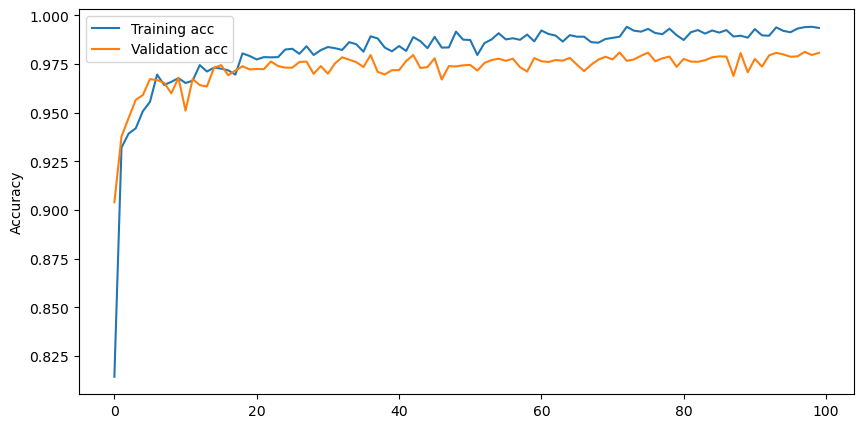

In [8]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.plot(history.history['accuracy'], label='Training acc')
ax1.plot(history.history['val_accuracy'], label='Validation acc')
plt.ylabel('Accuracy')
plt.legend()


3. For the third model, take the above MLP while adding dropout regularization during training. Apply a dropout rate of 0.5 to each of the hidden layers. Watch out for what happens with dropout when you’re making predictions on the hold-out set.

In [9]:
model_dropout = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  
  tf.keras.layers.Dense(
    1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1500, 
    use_bias=True, 
    activation='relu', 
    kernel_initializer = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01), 
    bias_initializer=tf.keras.initializers.Constant(value=-0.1)
  ),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, 
    activation = 'softmax',
    kernel_initializer = 'zeros', 
    bias_initializer= 'zeros'
  )
])

model_dropout.compile(loss = 'categorical_crossentropy', optimizer=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08), 
    metrics = ['accuracy']
)

#model.summary()

In [10]:
history_dropout = model_dropout.fit(
    x_train, 
    y_train, 
    epochs=100, 
    batch_size=100, 
    validation_data = (x_test,y_test),
    steps_per_epoch=100,
    verbose=False
)

2022-12-10 11:37:00.675015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-10 11:37:02.391594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


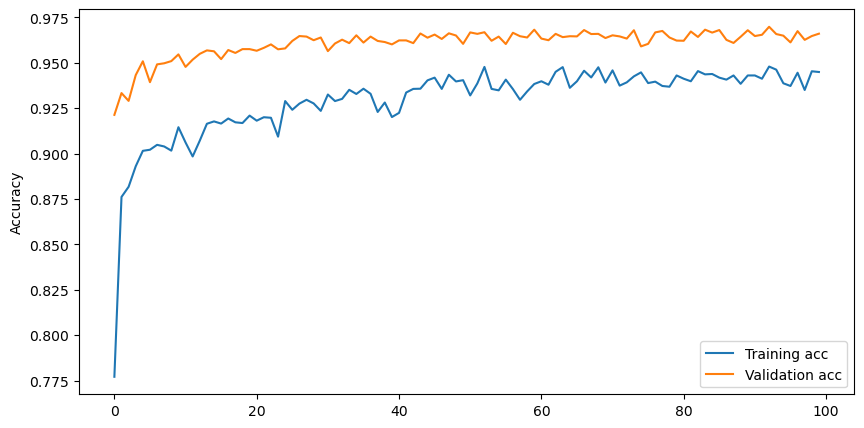

In [11]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.plot(history_dropout.history['accuracy'], label='Training acc')
ax1.plot(history_dropout.history['val_accuracy'], label='Validation acc')
plt.ylabel('Accuracy')
plt.legend()